# Matplotlib and pylab inline

In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Add path .. to make relative import

In [2]:
import sys

sys.path.insert(0, '..')

# Import libraries

In [3]:
import os
import cv2 as cv
import matplotlib.pyplot as plt

from matplotlib import rcParams
from src.preparation.reading import *
from src.processing.standardization import standardize_image
from src.processing.preprocessing import preproc_image
from src.processing.mask_and_contour import get_mask
from pandas import DataFrame

rcParams["figure.dpi"] = 100
rcParams["figure.figsize"] = (4, 5)
rcParams["image.cmap"] = "gray"

## Read image

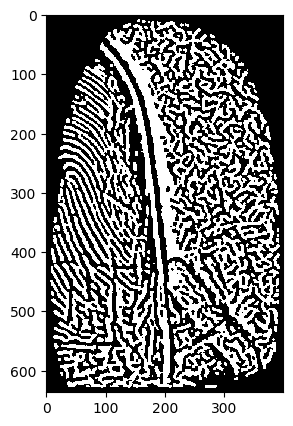

In [4]:
im = read_random_image(RAW_FILE_PATH_BADIM_PANTS)
std_im = standardize_image(im)
prep_im = preproc_image(std_im)

plt.imshow(prep_im)
plt.show()

In [5]:
def left_right_border(img, left_perc=0.15, right_perc=0.15):
    
    cs = np.cumsum(np.sum(img, axis=0))
    cs = cs / cs[-1]
    j1 = np.argmax(cs > left_perc)
    j2 = cs.size - np.argmax(cs[::-1] < 1-right_perc)
    
    contour_left = img.copy()
    contour_right = img.copy()
    
    contour_left[:, j1:] = 0
    contour_right[:, :j2] = 0     
    
    return contour_left, contour_right

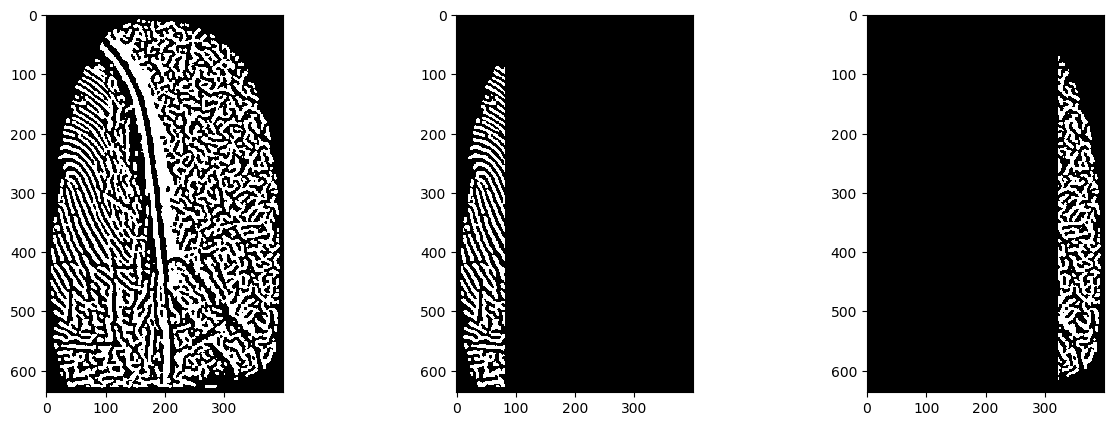

In [6]:
b_left, b_right = left_right_border(prep_im)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(prep_im)
ax2.imshow(b_left)
ax3.imshow(b_right)
plt.show()

In [7]:
def top_bottom_border(img, top_perc=0.10, bottom_perc=0.10):
    
    cs = np.cumsum(np.sum(img, axis=1))
    cs = cs / cs[-1]
    i1 = np.argmax(cs > top_perc)
    i2 = cs.size - np.argmax(cs[::-1] < 1-bottom_perc)
    
    contour_top = img.copy()
    contour_bottom = img.copy()
    
    contour_top[i1:, :] = 0
    contour_bottom[:i2, :] = 0   
    
    return contour_top, contour_bottom

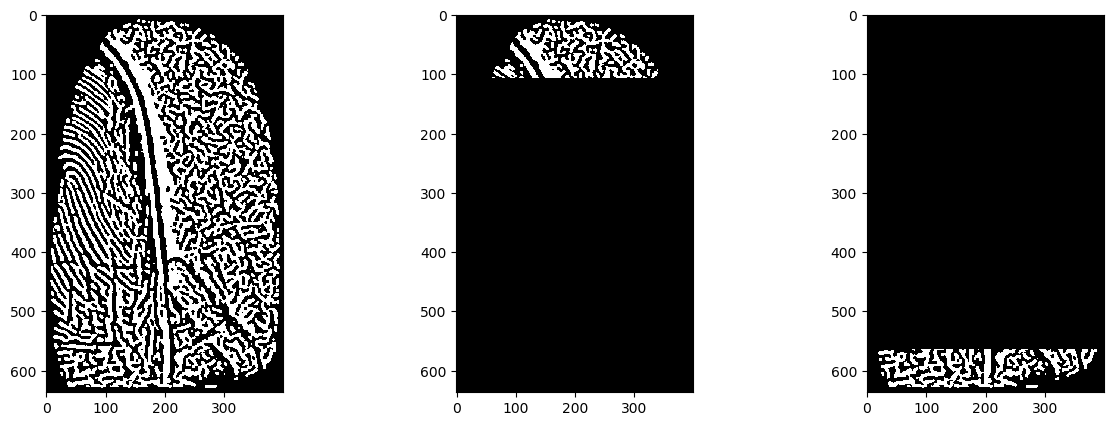

In [8]:
b_top, b_bottom = top_bottom_border(prep_im)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.imshow(prep_im)
ax2.imshow(b_top)
ax3.imshow(b_bottom)
plt.show()